In [1]:
#################### Majority in columns is null:
# output col: drop the rows that contian null
# important feature : drop the rows that contian null
# not output and not important : delete column or replace it "prefreable to delete"
# if i want to substitute 'replace' the null values : you can replace it with mode , mean ,..
# there is a technique if you have column contain nulls and their is another columns refer'affect' to it search for the other rows that contain data near to it
#################### Majority in rows is null:
# drop the rows

In [2]:
###### If i know that the outlier is incorrect value treat it as you treat null values or correct it
###### If i know that the outlier is correct value , ask the client if he needed it , yes -> keep it , no -> keep it you may delete it 
## Outliers with correct values kept but with small quantity 10%->20% 

In [28]:
import pandas as pd
import numpy as np

In [34]:
data = pd.read_csv('Dry_Bean_Dataset.csv')
data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [6]:
data.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [7]:
data['Perimeter'].describe()

count    13611.000000
mean       855.283459
std        214.289696
min        524.736000
25%        703.523500
50%        794.941000
75%        977.213000
max       1985.370000
Name: Perimeter, dtype: float64

<Axes: >

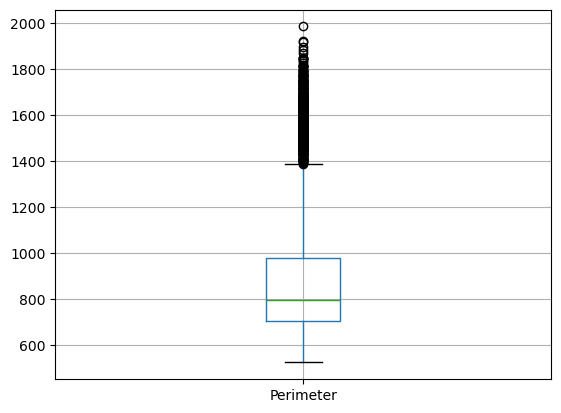

In [8]:
data.boxplot('Perimeter')

In [10]:
data[data['Perimeter']<1400].shape

(13115, 17)

In [11]:
data[data['Perimeter']>1400].shape

(496, 17)

In [14]:
filteredData = data[data['Perimeter']<1400]

In [15]:
filteredData.shape

(13115, 17)

In [19]:
filteredData['Perimeter'].describe()

count    13115.000000
mean       827.221384
std        160.053647
min        524.736000
25%        700.314500
50%        786.695000
75%        954.850000
max       1396.139000
Name: Perimeter, dtype: float64

In [20]:
RangeData = data[data['Perimeter']<1400]
OutlierData = data[data['Perimeter']>=1400]
RangeData.shape,OutlierData.shape

((13115, 17), (496, 17))

In [22]:
OutlierSample = OutlierData.sample(frac=0.2)
OutlierSample.shape

(99, 17)

In [24]:
FinalData = pd.concat([RangeData,OutlierSample],axis=0)
FinalData.shape

(13214, 17)

In [27]:
FinalData.reset_index(inplace=True)
FinalData

,index,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13209,3548,165330,1540.253,574.535399,368.862049,1.557589,0.766690,167922,458.807905,0.776744,0.984564,0.875744,0.798572,0.003475,0.000872,0.637717,0.993301,BOMBAY
13210,3610,171566,1554.742,575.336396,381.642669,1.507526,0.748320,173000,467.380590,0.828037,0.991711,0.891917,0.812361,0.003353,0.000901,0.659930,0.994861,BOMBAY
13211,3399,144083,1416.894,508.239887,362.822978,1.400793,0.700267,145241,428.313172,0.797034,0.992027,0.901878,0.842738,0.003527,0.001098,0.710208,0.994854,BOMBAY
13212,3822,204635,1706.370,635.126287,412.663916,1.539088,0.760161,206334,510.440373,0.807044,0.991766,0.883168,0.803683,0.003104,0.000799,0.645907,0.994108,BOMBAY


In [29]:
### 2- Interquartile range IQR
x = 'Perimeter'
q75,q25 = np.percentile(data.loc[:,x],[75,25])
q75,q25

(977.213, 703.5235)

In [30]:
inter_qr = q75-q25
inter_qr

273.68949999999995

In [31]:
Max = q75+(1.5*inter_qr)
Min = q25-(1.5*inter_qr)
Min,Max

(292.9892500000001, 1387.74725)

In [35]:
data.loc[data[x]<Min,x] = np.nan
data.loc[data[x]>Max,x] = np.nan

data = data.dropna(axis=0)
data.reset_index(inplace=True)
data

,index,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13106,13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13107,13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13108,13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13109,13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [37]:
# 3-z-score
data = pd.read_csv('Dry_Bean_Dataset.csv')
data['Perimeter'].mean(),data['Perimeter'].std()

(855.283458599662, 214.28969589196163)

In [38]:
threshold = 3
outlier = []
for i in data['Perimeter'].tolist():
    z = (i-data['Perimeter'].mean())/data['Perimeter'].std()
    print(z)
    if abs(z) > threshold:
        outlier.append(i)
print("Outliers in dataset : ",outlier)

-1.1432768970990548
-1.0138866346107498
-1.078789428663022
-0.9771793166631534
-1.0973437505750032
-1.0283110332601295
-0.8644860772636481
-1.0525772490403869
-1.0247924319719923
-1.0422781070736509
-1.0010675394668336
-1.0113666814335696
-1.001865524639607
-0.9923830341654761
-0.9994809022812011
-1.019159869962998
-0.9838525260027243
-1.0056547875652933
-1.010862690798133
-1.0279190405436796
-1.0214324944024185
-1.0099713740262048
-0.8454930968356396
-0.9266542554606836
-0.9232943178911094
-0.9732733892385236
-0.928548886923527
-0.9961162981316694
-0.953519756277403
-0.9948749878629102
-0.9594603125636079
-0.8994900935266689
-0.9280868955077104
-1.0012868687248475
-1.0047588042134068
-1.0030601691087893
-0.9368087334487298
-0.9408173256324296
-0.9381993742761369
-0.9809079140493889
-0.9456005700891154
-0.9949216536624875
-0.8678460148332223
-0.8945901845710402
-0.96466354921649
-0.935138097823858
-0.9196310526242824
-0.9411953186090068
-0.8856723502717955
-0.9857331577256938
-0.935534

In [39]:
outlierIndices = [i for i,j in enumerate(data['Perimeter'].tolist()) if j in outlier]
len(outlierIndices)

404

In [42]:
Data = data.drop(outlierIndices,axis=0)
Data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [43]:
# 4- Gaussian Distribution
mu = data['Perimeter'].mean()
sigma = data['Perimeter'].std()
limit = sigma*1.5

min_threshold = mu-limit
max_threshold = mu+limit

mu,sigma,limit,min_threshold,max_threshold

(855.283458599662,
 214.28969589196163,
 321.43454383794244,
 533.8489147617196,
 1176.7180024376044)

In [44]:
data[data['Perimeter']<min_threshold].shape

(8, 17)

In [45]:
data[data['Perimeter']>max_threshold].shape

(698, 17)